## Automaded Dialogue Games

### Authors: Stefan Sarkadi and Ionut Moraru
#### AAAI2020

Two agents, Deceiver (DEC), and an Interrogator (INT) take part in a dialogue game based on a World Graph (WG). Both agents have a knowledge base (KB) and a Theory of Mind of each other (ToM). The goal of DEC $G_{Dec}$ is to make INT infer the wrong color of the nodes that make up the WG.

The social parameters that influence the interaction between the two agents are the following:

1) Trust

2) Cognitive Load

3) Communicative skill (Cognitive resources)

4) Rewards for both agents + rewards calculated by the game

The actions that INT can perform are accept/reject argument provided by DEC, ask DEC about colour of a node.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

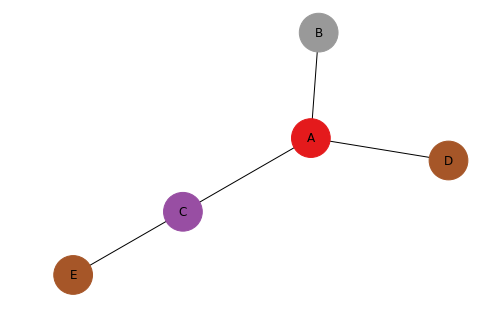

In [8]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group4','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)

In [24]:
G = nx.Graph()

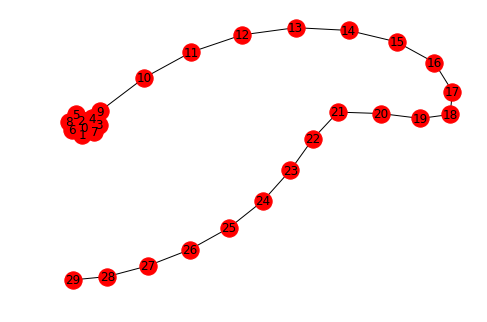

In [9]:
nx.draw(G, with_labels=True)

In [7]:
G = nx.Graph()
G.clear()
G=nx.lollipop_graph(10,20)

In [12]:
class Deceiver(object):
    KB = nx.Graph()
    TS = []
    ToM = {'KBInt': nx.Graph, 'TS': []}
    Goal = []
    CogRes = 0
    Reward = 0
    TrustOfINT = 0 
    Win = False
    
#   Initializer for the Deceiver class
    def __init__(self, KB, TS, ToM, Goal, CogRes, Reward, TrustOfINT):
        self.KB = KB
        self.TS = TS
        self.ToM = ToM
        self.Goal = Goal
        self.CogRes = CogRes
        self.Reward = Reward
        self.TrustOfINT = TrustOfINT
        self.Win = False
        
#   In this method, the Deceiver will respond to the querry about a node by returning the dict with a color attribute
    def respondToINT(self, node):
        color = ''
        
        actualColor = KB[node]['color']
        
        # TODO:Calculate if we should respond truthfuly or not in this case.
        
        
        response = {'color': color}
        return response
    
    def receiveAcceptance(self, accept):
        # Proces and update all the values depending on the truth value of the Acceptance. 
        # Ask stefan what needs to be updated when
        if accept:
            print('accept')
        else:
            print('reject')
        
            
        self.checkGoal()
            
    def checkGoal(self):
        # check if Goal condition is satisfied with the current ToM.
        return True
        
        

In [28]:
class Interogator(object):
    KB = nx.Graph()
    KB.add_edge('a', 'b')
    TS = []
    ToM = {'KBDec': nx.Graph, 'TS': []}
    CogRes = 0
    Reward = 0
    TrustOfDEC = 0 
    Complete = False
    
    def __int__(self, KB, TS, ToM, CogRes, Reward, TrustOfDEC):
        self.KB = KB
        self.TS = TS
        self.ToM = ToM
        self.CogRes = CogRes
        self.Reward = Reward
        self.TrustOfDEC = TrustOfDEC
        self.Complete = Complete
        
    def askDEC(self, node = []):
        # select node from open list and interogate DEC for its attribute
        
        return node[0]
    
    def verifyResponse(self, node):
        # check in TS if the color of the node returned is valid and if trust is passable
        accept = False
        parent = self.KB.predecessors()
        
        attributes = (node, nx.get_node_attributes(self.KB, parent))
                
        for trans in TS:
            # check if the response color is concuring to the current TS, if yes, then change accept to True.
            print(trans)
            if (trans[0] == attributes[0]) and (trans[1] == attributes[1]):
                accept = True
                self.TrustOfDEC +=1
        
        if accept = False:
            if self.TrustOfDEC >5:
                accept = True
                
        
        return accept
    
    def simulateSteps(self):
        #based on the CogRes, simulate and give colors to the next nodes in the WG
        
    
        